# Modèle de Pricing

## Objectif
Entraîner un modèle de Machine Learning pour prédire le prix de location journalier (`rental_price_per_day`) à partir des caractéristiques du véhicule.

In [2]:
!pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 42.0 MB/s  0:00:00 eta 0:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 64.5 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 48.2 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [matplotlib]7 [matplotlib]


In [4]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import joblib
import warnings

## Chargement et exploration des données

In [7]:
df = pd.read_csv('get_around_pricing_project.csv')

df.head()

,Unnamed: 0,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
0,0,Citroën,140411,100,diesel,black,convertible,True,True,False,False,True,True,True,106
1,1,Citroën,13929,317,petrol,grey,convertible,True,True,False,False,False,True,True,264
2,2,Citroën,183297,120,diesel,white,convertible,False,False,False,False,True,False,True,101
3,3,Citroën,128035,135,diesel,red,convertible,True,True,False,False,True,True,True,158
4,4,Citroën,97097,160,diesel,silver,convertible,True,True,False,False,False,True,True,183


In [8]:
# Supprimer la colonne index inutile
df = df.drop('Unnamed: 0', axis=1)

In [9]:
df.head()

,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
0,Citroën,140411,100,diesel,black,convertible,True,True,False,False,True,True,True,106
1,Citroën,13929,317,petrol,grey,convertible,True,True,False,False,False,True,True,264
2,Citroën,183297,120,diesel,white,convertible,False,False,False,False,True,False,True,101
3,Citroën,128035,135,diesel,red,convertible,True,True,False,False,True,True,True,158
4,Citroën,97097,160,diesel,silver,convertible,True,True,False,False,False,True,True,183


In [10]:
df.shape

(4843, 14)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   model_key                  4843 non-null   object
 1   mileage                    4843 non-null   int64 
 2   engine_power               4843 non-null   int64 
 3   fuel                       4843 non-null   object
 4   paint_color                4843 non-null   object
 5   car_type                   4843 non-null   object
 6   private_parking_available  4843 non-null   bool  
 7   has_gps                    4843 non-null   bool  
 8   has_air_conditioning       4843 non-null   bool  
 9   automatic_car              4843 non-null   bool  
 10  has_getaround_connect      4843 non-null   bool  
 11  has_speed_regulator        4843 non-null   bool  
 12  winter_tires               4843 non-null   bool  
 13  rental_price_per_day       4843 non-null   int64 
dtypes: bool(

In [12]:
df.describe()

,mileage,engine_power,rental_price_per_day
count,4.843000e+03,4843.00000,4843.000000
mean,1.409628e+05,128.98823,121.214536
std,6.019674e+04,38.99336,33.568268
min,-6.400000e+01,0.00000,10.000000
25%,1.029135e+05,100.00000,104.000000
50%,1.410800e+05,120.00000,119.000000
75%,1.751955e+05,135.00000,136.000000
max,1.000376e+06,423.00000,422.000000


In [13]:
df.isnull().sum()

model_key                    0
mileage                      0
engine_power                 0
fuel                         0
paint_color                  0
car_type                     0
private_parking_available    0
has_gps                      0
has_air_conditioning         0
automatic_car                0
has_getaround_connect        0
has_speed_regulator          0
winter_tires                 0
rental_price_per_day         0
dtype: int64

In [14]:
df.duplicated().sum()

np.int64(0)

## Analyse de la variable cible

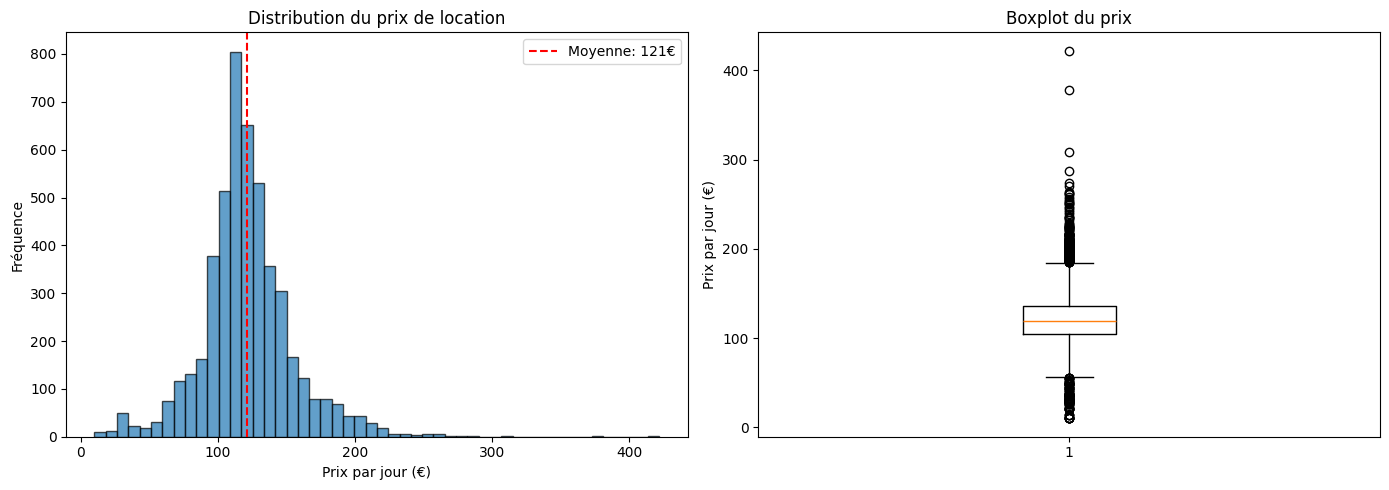

Prix moyen: 121.21€
Prix médian: 119.00€
Écart-type: 33.57€


In [15]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Distribution
axes[0].hist(df['rental_price_per_day'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Prix par jour (€)')
axes[0].set_ylabel('Fréquence')
axes[0].set_title('Distribution du prix de location')
axes[0].axvline(df['rental_price_per_day'].mean(), color='red', linestyle='--', label=f"Moyenne: {df['rental_price_per_day'].mean():.0f}€")
axes[0].legend()

# Boxplot
axes[1].boxplot(df['rental_price_per_day'])
axes[1].set_ylabel('Prix par jour (€)')
axes[1].set_title('Boxplot du prix')

plt.tight_layout()
plt.show()

print(f"Prix moyen: {df['rental_price_per_day'].mean():.2f}€")
print(f"Prix médian: {df['rental_price_per_day'].median():.2f}€")
print(f"Écart-type: {df['rental_price_per_day'].std():.2f}€")

Histogramme : la distribution des prix est légèrement asymétrique à droite, avec la majorité des véhicules entre 80€ et 150€/jour. Le prix moyen (121€) est proche du médian (119€), indiquant une distribution relativement équilibrée.

Boxplot : la boîte centrale (50% des données) est compacte autour de 100-140€, mais plusieurs outliers existent au-dessus de 200€, correspondant probablement à des véhicules premium ou de luxe.

## Analyse des features

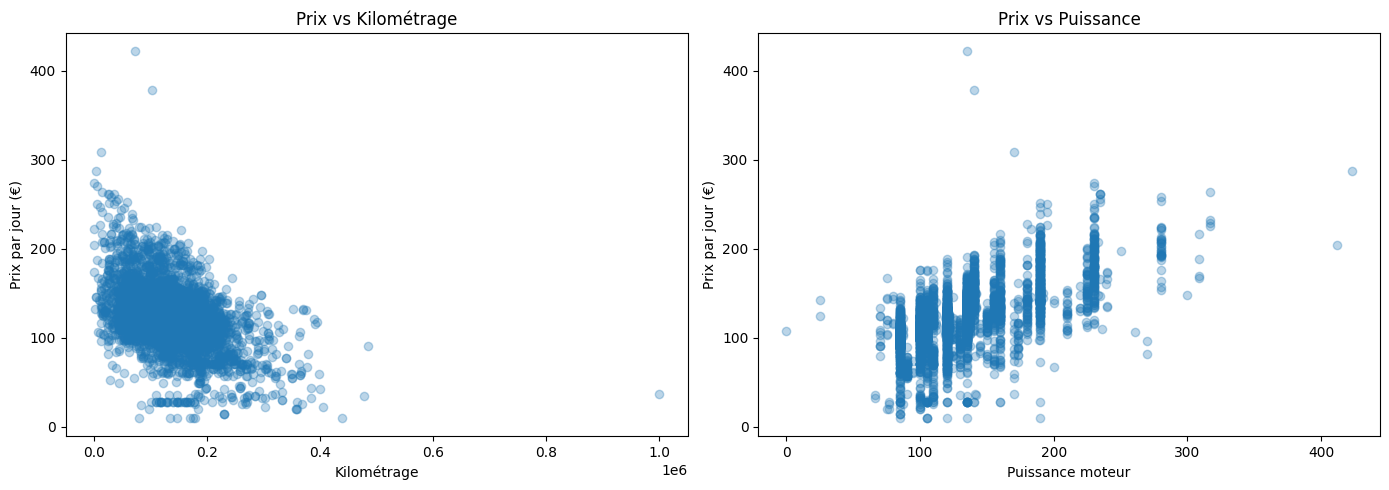

In [16]:
# Variables numériques vs prix
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].scatter(df['mileage'], df['rental_price_per_day'], alpha=0.3)
axes[0].set_xlabel('Kilométrage')
axes[0].set_ylabel('Prix par jour (€)')
axes[0].set_title('Prix vs Kilométrage')

axes[1].scatter(df['engine_power'], df['rental_price_per_day'], alpha=0.3)
axes[1].set_xlabel('Puissance moteur')
axes[1].set_ylabel('Prix par jour (€)')
axes[1].set_title('Prix vs Puissance')

plt.tight_layout()
plt.show()

Prix vs Kilométrage : tendance négative légère — les véhicules avec un kilométrage élevé ont généralement un prix plus bas. La majorité des voitures ont moins de 200,000 km.

Prix vs Puissance : corrélation positive claire — plus la puissance moteur augmente, plus le prix de location est élevé.

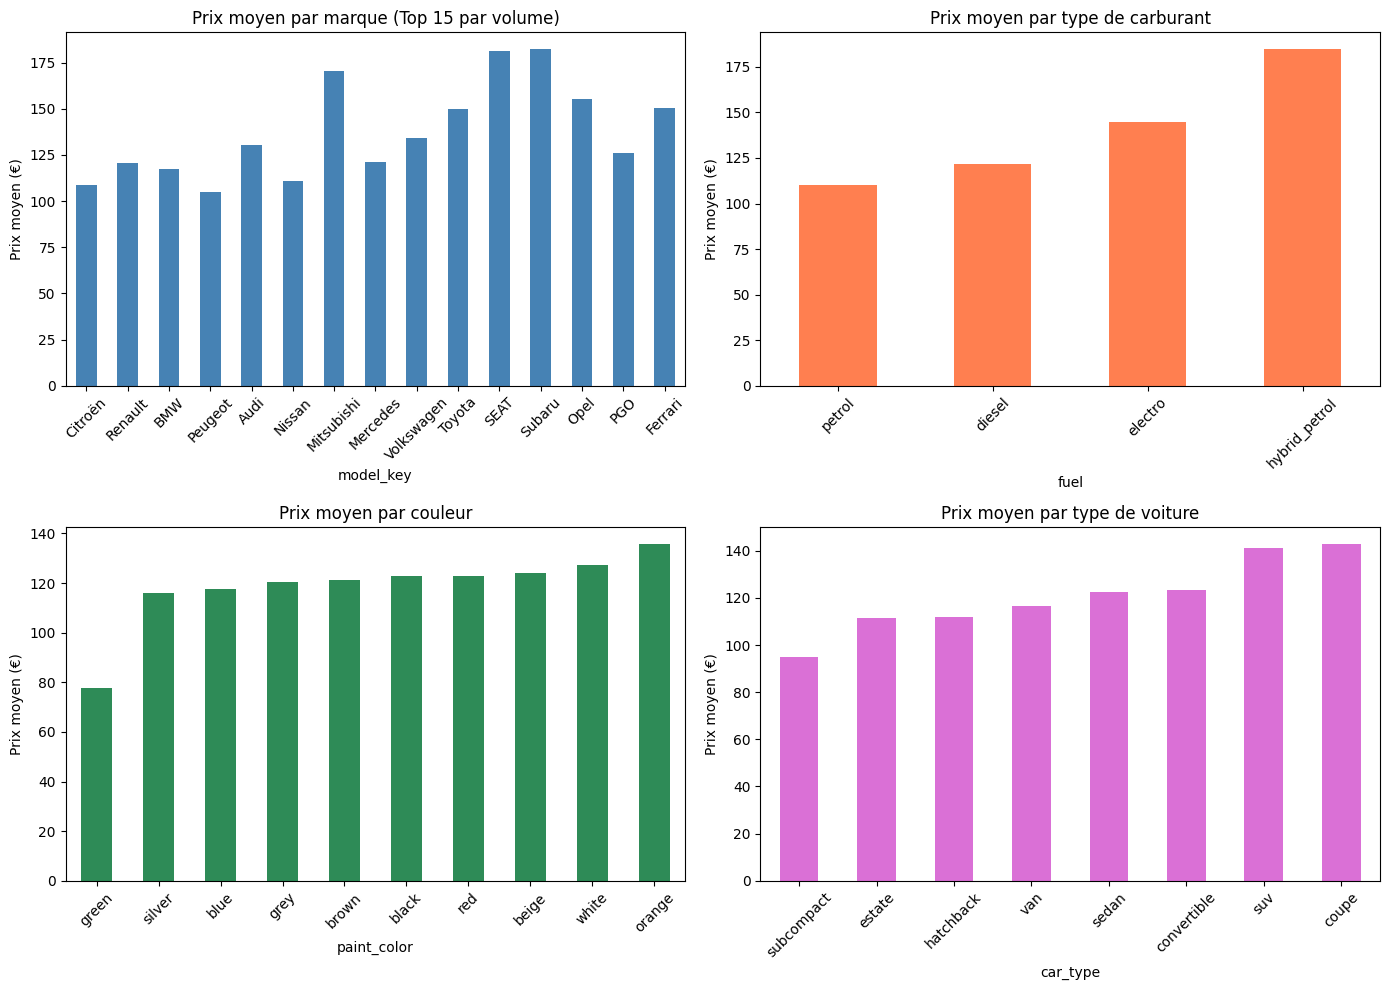

In [17]:
# Analyse des variables catégorielles
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. model_key (top 15)
df.groupby('model_key')['rental_price_per_day'].agg(['mean', 'count']).sort_values('count', ascending=False).head(15)['mean'].plot(kind='bar', ax=axes[0,0], color='steelblue')
axes[0,0].set_title('Prix moyen par marque (Top 15 par volume)')
axes[0,0].set_ylabel('Prix moyen (€)')
axes[0,0].tick_params(axis='x', rotation=45)

# 2. fuel
df.groupby('fuel')['rental_price_per_day'].mean().sort_values().plot(kind='bar', ax=axes[0,1], color='coral')
axes[0,1].set_title('Prix moyen par type de carburant')
axes[0,1].set_ylabel('Prix moyen (€)')
axes[0,1].tick_params(axis='x', rotation=45)

# 3. paint_color
df.groupby('paint_color')['rental_price_per_day'].mean().sort_values().plot(kind='bar', ax=axes[1,0], color='seagreen')
axes[1,0].set_title('Prix moyen par couleur')
axes[1,0].set_ylabel('Prix moyen (€)')
axes[1,0].tick_params(axis='x', rotation=45)

# 4. car_type
df.groupby('car_type')['rental_price_per_day'].mean().sort_values().plot(kind='bar', ax=axes[1,1], color='orchid')
axes[1,1].set_title('Prix moyen par type de voiture')
axes[1,1].set_ylabel('Prix moyen (€)')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


Prix par marque (bleu) : parmi les marques les plus représentées, Mercedes, SEAT et Subaru ont les prix les plus élevés, tandis que Peugeot et Citroën sont plus abordables.

Prix par carburant (orange) : les véhicules hybrides sont les plus chers (185€), suivis des électriques. Les véhicules essence et diesel sont moins chers, probablement car plus courants.

Prix par couleur (vert) : l'orange et le blanc sont les couleurs les plus chères, tandis que le vert est nettement moins cher. Cela peut refléter des associations avec des véhicules premium ou sportifs.

Prix par type de voiture (violet) : les coupés et SUV sont les plus chers, les subcompacts les moins chers.

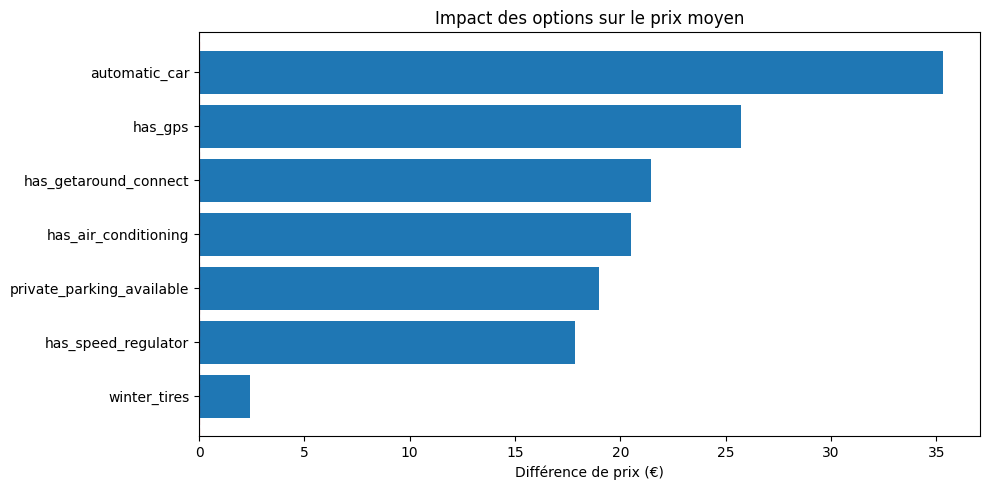

In [18]:
# Impact des options sur le prix
bool_cols = ['private_parking_available', 'has_gps', 'has_air_conditioning',
             'automatic_car', 'has_getaround_connect', 'has_speed_regulator', 'winter_tires']

price_diff = []
for col in bool_cols:
    with_option = df[df[col] == True]['rental_price_per_day'].mean()
    without_option = df[df[col] == False]['rental_price_per_day'].mean()
    diff = with_option - without_option
    price_diff.append({'option': col, 'diff': diff})

diff_df = pd.DataFrame(price_diff).sort_values('diff')

plt.figure(figsize=(10, 5))
plt.barh(diff_df['option'], diff_df['diff'])
plt.xlabel('Différence de prix (€)')
plt.title('Impact des options sur le prix moyen')
plt.axvline(x=0, color='red', linestyle='--')
plt.tight_layout()
plt.show()

Impact des options sur le prix : la boîte automatique (automatic_car) a le plus grand impact (+35€/jour), suivie du GPS (+25€) et de GetAround Connect (+20€). Les pneus hiver ont un impact négligeable (~2€). Cela suggère que les options de confort/technologie sont plus valorisées que les équipements saisonniers.

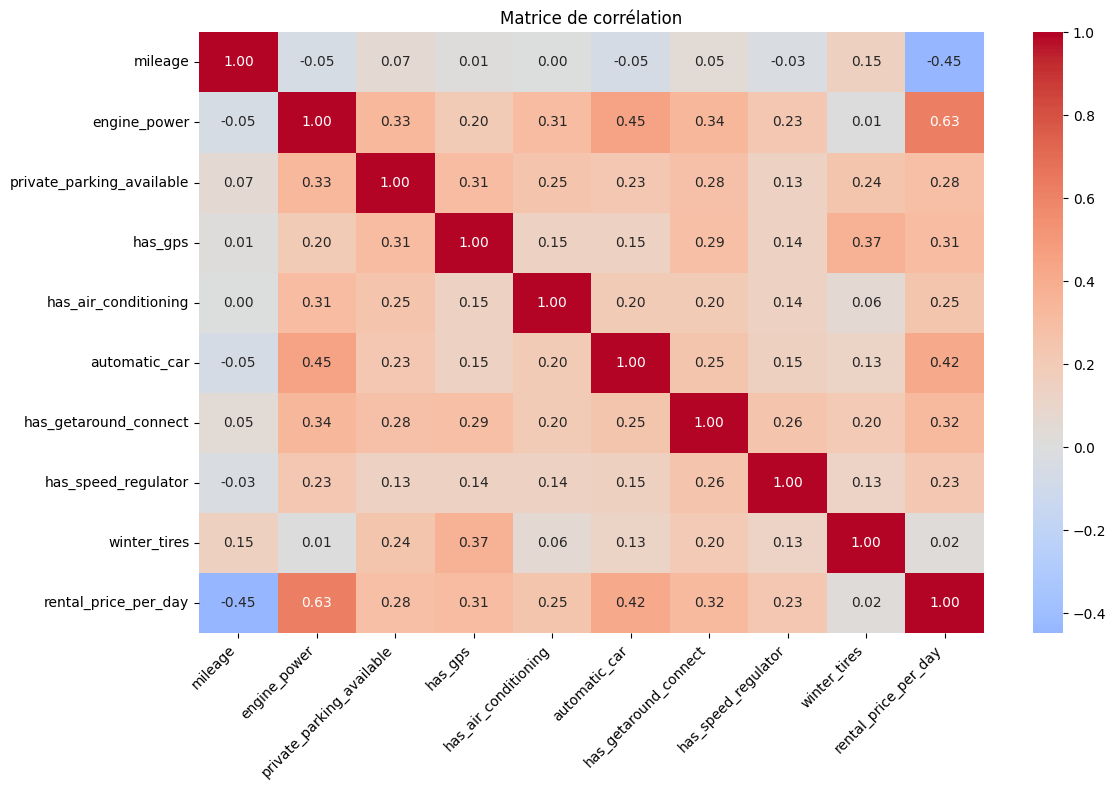

In [19]:
# Matrice de corrélation
# Sélection des variables numériques et booléennes
numeric_cols = ['mileage', 'engine_power', 'private_parking_available', 'has_gps',
                'has_air_conditioning', 'automatic_car', 'has_getaround_connect',
                'has_speed_regulator', 'winter_tires', 'rental_price_per_day']

corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.xticks(rotation=45, ha='right')
plt.title('Matrice de corrélation')
plt.tight_layout()
plt.show()

Corrélations avec le prix (rental_price_per_day) :

engine_power (+0.63) : plus forte corrélation positive — la puissance est le meilleur prédicteur du prix

automatic_car (+0.42) : les voitures automatiques sont plus chères

mileage (-0.45) : corrélation négative — plus le kilométrage est élevé, moins le prix est élevé

## Préparation des données

In [20]:
# Séparation features / target
X = df.drop('rental_price_per_day', axis=1)
y = df['rental_price_per_day']

# Identification des colonnes
numeric_features = ['mileage', 'engine_power']
categorical_features = ['model_key', 'fuel', 'paint_color', 'car_type']
boolean_features = ['private_parking_available', 'has_gps', 'has_air_conditioning',
                    'automatic_car', 'has_getaround_connect', 'has_speed_regulator', 'winter_tires']

print(f"Features numériques: {numeric_features}")
print(f"Features catégorielles: {categorical_features}")
print(f"Features booléennes: {boolean_features}")

Features numériques: ['mileage', 'engine_power']
Features catégorielles: ['model_key', 'fuel', 'paint_color', 'car_type']
Features booléennes: ['private_parking_available', 'has_gps', 'has_air_conditioning', 'automatic_car', 'has_getaround_connect', 'has_speed_regulator', 'winter_tires']


In [21]:
# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train: {X_train.shape}")
print(f"Test: {X_test.shape}")

Train: (3874, 13)
Test: (969, 13)


In [22]:
# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('bool', 'passthrough', boolean_features)
    ])

preprocessor

,transformers,"[('num', ...), ('cat', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,copy,True
,with_mean,True
,with_std,True


#### Note sur les outliers

L'analyse révèle des valeurs extrêmes dans les prix :
- **Min** : 10€/jour (véhicules économiques)
- **Max** : 422€/jour (véhicules premium/sportifs)
- **Outliers IQR** : 345 observations (7.1%) hors de [56€, 184€]
- **P1-P99** : 28€ - 216€

**Décision** : je conserve tous les outliers car :
1. ils représentent des segments de marché légitimes (véhicules de luxe, sportifs, etc.)
2. les outliers hauts correspondent à des voitures puissantes (>300 ch), coupés, convertibles
3. les modèles d'ensemble (Random Forest, Gradient Boosting) sont robustes aux outliers
4. l'API doit pouvoir prédire des prix pour tous les segments du marché

## Entraînement des modèles

In [23]:
# Définition des modèles à tester
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

results = []

for name, model in models.items():
    print(f"Training {name}...")

    # Créer le pipeline
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    # Cross-validation
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2')

    # Entraînement final
    pipeline.fit(X_train, y_train)

    # Prédictions
    y_pred = pipeline.predict(X_test)

    # Métriques
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({
        'Model': name,
        'CV R2 (mean)': cv_scores.mean(),
        'CV R2 (std)': cv_scores.std(),
        'Test RMSE': rmse,
        'Test MAE': mae,
        'Test R2': r2
    })

    print(f"  CV R2: {cv_scores.mean():.3f} (+/- {cv_scores.std():.3f})")
    print(f"  Test R2: {r2:.3f}, RMSE: {rmse:.2f}€, MAE: {mae:.2f}€\n")

results_df = pd.DataFrame(results)
results_df

Training Linear Regression...
  CV R2: 0.701 (+/- 0.040)
  Test R2: 0.694, RMSE: 17.96€, MAE: 12.12€

Training Ridge...
  CV R2: 0.702 (+/- 0.041)
  Test R2: 0.693, RMSE: 17.97€, MAE: 12.12€

Training Random Forest...
  CV R2: 0.752 (+/- 0.038)
  Test R2: 0.734, RMSE: 16.73€, MAE: 10.68€

Training Gradient Boosting...
  CV R2: 0.736 (+/- 0.044)
  Test R2: 0.724, RMSE: 17.04€, MAE: 11.37€



,Model,CV R2 (mean),CV R2 (std),Test RMSE,Test MAE,Test R2
0,Linear Regression,0.701162,0.039593,17.960869,12.115438,0.693709
1,Ridge,0.702360,0.040756,17.968931,12.118593,0.693434
2,Random Forest,0.752250,0.037692,16.734767,10.679020,0.734100
3,Gradient Boosting,0.735578,0.043811,17.041001,11.371851,0.724279


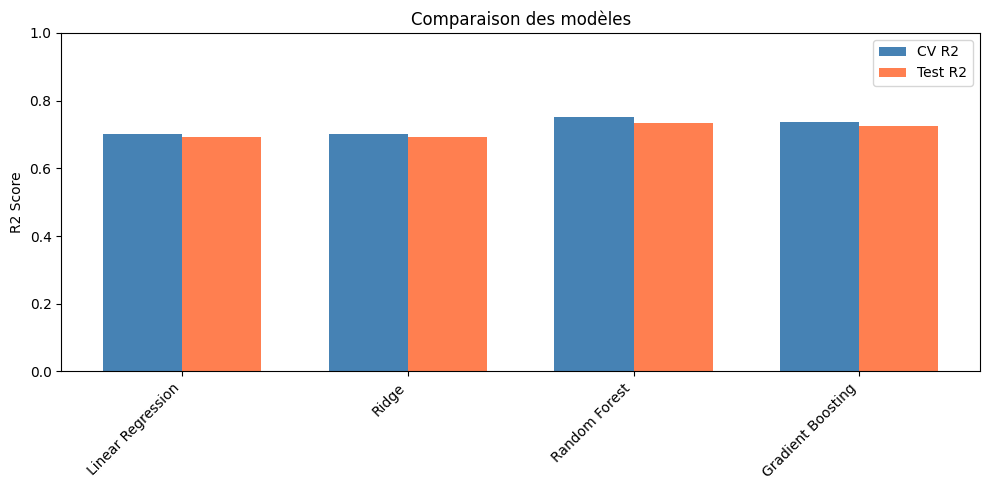

In [24]:
# Visualisation des résultats
fig, ax = plt.subplots(figsize=(10, 5))
x = np.arange(len(results_df))
width = 0.35

ax.bar(x - width/2, results_df['CV R2 (mean)'], width, label='CV R2', color='steelblue')
ax.bar(x + width/2, results_df['Test R2'], width, label='Test R2', color='coral')

ax.set_ylabel('R2 Score')
ax.set_title('Comparaison des modèles')
ax.set_xticks(x)
ax.set_xticklabels(results_df['Model'], rotation=45, ha='right')
ax.legend()
ax.set_ylim(0, 1)

plt.tight_layout()
plt.show()

Tous les modèles ont des performances similaires avec une légère supériorité pour Random Forest (0.74). Les scores CV et Test sont très proches, indiquant une bonne généralisation sans overfitting. Linear Regression et Ridge sont légèrement en retrait, suggérant que les relations non-linéaires sont importantes pour le pricing.

## Sélection et sauvegarde du meilleur modèle

In [25]:
# Sélection du meilleur modèle (basé sur Test R2)
best_model_name = results_df.loc[results_df['Test R2'].idxmax(), 'Model']
print(f"Meilleur modèle: {best_model_name}")

# Réentraînement du meilleur modèle
best_model = models[best_model_name]

final_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', best_model)
])

# Entraînement sur toutes les données d'entraînement
final_pipeline.fit(X_train, y_train)

Meilleur modèle: Random Forest


,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [26]:
# Évaluation finale
y_pred_final = final_pipeline.predict(X_test)

print(f"=== Performance finale ({best_model_name}) ===")
print(f"R2: {r2_score(y_test, y_pred_final):.3f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_final)):.2f}€")
print(f"MAE: {mean_absolute_error(y_test, y_pred_final):.2f}€")

=== Performance finale (Random Forest) ===
R2: 0.734
RMSE: 16.73€
MAE: 10.68€


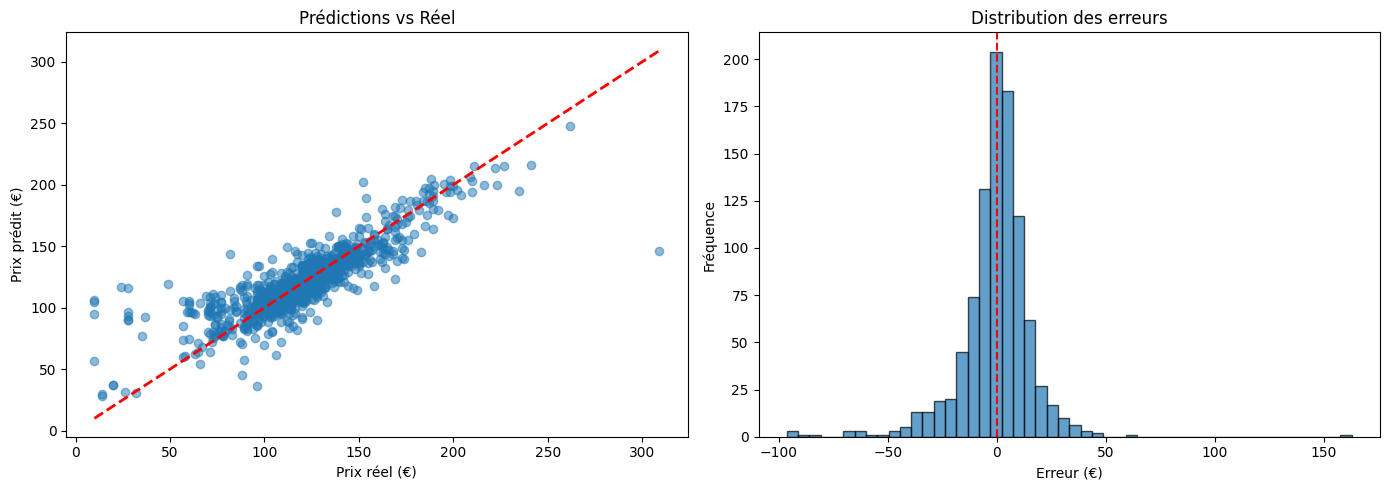

In [27]:
# Visualisation prédictions vs réel
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Scatter plot
axes[0].scatter(y_test, y_pred_final, alpha=0.5)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0].set_xlabel('Prix réel (€)')
axes[0].set_ylabel('Prix prédit (€)')
axes[0].set_title('Prédictions vs Réel')

# Distribution des erreurs
errors = y_test - y_pred_final
axes[1].hist(errors, bins=50, edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Erreur (€)')
axes[1].set_ylabel('Fréquence')
axes[1].set_title('Distribution des erreurs')
axes[1].axvline(x=0, color='red', linestyle='--')

plt.tight_layout()
plt.show()

Prédictions vs Réel : les points sont bien alignés le long de la diagonale rouge, confirmant que le modèle prédit correctement. Quelques écarts sont visibles aux extrêmes (véhicules très chers ou très bon marché), mais globalement le modèle capture bien la tendance.

Distribution des erreurs : les erreurs suivent une distribution quasi-normale centrée sur 0, ce qui est idéal. La majorité des erreurs sont entre -20€ et +20€, avec quelques prédictions sous-estimées (erreurs négatives) pour les véhicules premium. Cela indique un modèle bien calibré sans biais systématique.

In [28]:
# Sauvegarde du modèle
joblib.dump(final_pipeline, 'model.joblib')
print("Modèle sauvegardé: model.joblib")

Modèle sauvegardé: model.joblib


## Teste du modèle sauvegardé

In [29]:
# Chargement et test
loaded_model = joblib.load('model.joblib')

# Test avec un exemple
sample = X_test.iloc[[0]]
print("Exemple d'entrée:")
print(sample.to_dict('records')[0])
print(f"\nPrix réel: {y_test.iloc[0]}€")
print(f"Prix prédit: {loaded_model.predict(sample)[0]:.2f}€")

Exemple d'entrée:
{'model_key': 'Renault', 'mileage': 109839, 'engine_power': 135, 'fuel': 'diesel', 'paint_color': 'black', 'car_type': 'sedan', 'private_parking_available': True, 'has_gps': True, 'has_air_conditioning': False, 'automatic_car': False, 'has_getaround_connect': True, 'has_speed_regulator': False, 'winter_tires': True}

Prix réel: 152€
Prix prédit: 136.98€


## Features pour l'API

Liste des features attendues par le modèle :

In [30]:
feature_list = list(X.columns)
print("Features attendues par l'API:")
for i, f in enumerate(feature_list):
    dtype = str(X[f].dtype)
    print(f"  {i+1}. {f} ({dtype})")

Features attendues par l'API:
  1. model_key (object)
  2. mileage (int64)
  3. engine_power (int64)
  4. fuel (object)
  5. paint_color (object)
  6. car_type (object)
  7. private_parking_available (bool)
  8. has_gps (bool)
  9. has_air_conditioning (bool)
  10. automatic_car (bool)
  11. has_getaround_connect (bool)
  12. has_speed_regulator (bool)
  13. winter_tires (bool)
